# Flow for Testing 2 Models on PCA-Transformed Data

###  1. Data Preprocessing: Load Data & Apply Train / Split 

###  2. Model 1: Linear Regression

###  3. Model 2: Random Forest Regressor

###  4. Evaluate Model

###  5. Compare Model Performance

###


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Import data prepared in EDA after PCA as X to apply Train / Slpit
X_pca_df = pd.read_csv('../03_processed_data/austin_housePrice_and_income_data_af_EDA_PCA.csv', low_memory=False)

In [3]:
# Import latest price data prepared in EDA as y to apply Train / Slpit
price_df = pd.read_csv('../03_processed_data/austin_house_latest_price_af_EDA_PCA.csv', low_memory=False)

In [4]:
X_pca_df.shape

(14733, 21)

In [5]:
X_pca_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-5.379758,0.648896,-2.629987,1.324556,-0.516044,0.427367,0.546198,-0.587476,0.039581,0.438053,...,-0.767747,-0.156695,-0.549759,0.218354,0.116504,-0.328465,0.582334,0.479656,-0.505311,-0.004051
1,-7.208337,-0.966254,1.095604,0.717953,-0.080117,0.693292,-1.211534,-0.774333,1.122348,-0.524450,...,0.192458,-0.692881,-1.037051,0.046027,0.652425,-0.090386,0.285770,0.708868,-0.829704,0.396564
2,-6.081084,-0.414975,1.218486,0.127784,0.498252,0.771453,1.031908,-0.715777,1.232344,-0.333929,...,-1.189015,0.675197,-0.176295,-0.144557,-0.254441,-0.728268,-0.751226,0.383660,-0.084570,-1.505631


In [6]:
y_price_df = price_df.latest_price

In [7]:
y_price_df.shape

(14733,)

In [8]:
y_price_df.head(3)

0     715000.0
1    1025000.0
2     825000.0
Name: latest_price, dtype: float64

In [9]:
type(y_price_df)

pandas.core.series.Series

In [10]:
# Conduct 70/30 train/test split
X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y_price_df, test_size=0.3, random_state=42)

In [11]:
X_train.shape, X_test.shape

((10313, 21), (4420, 21))

In [12]:
y_train.shape, y_test.shape

((10313,), (4420,))

###  Model 1: Linear Regression

In [13]:
# Model 1: Linear Regression
model_lr = LinearRegression()

In [14]:
# Train the Model
model_lr.fit(X_train, y_train)

LinearRegression()

In [15]:
# Evaluate the Model 1

y_pred_lr = model_lr.predict(X_test)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False).round(2)
r2_lr = r2_score(y_test, y_pred_lr).round(2)
print(f"Linear Regression - RMSE: {rmse_lr}, R²: {r2_lr}")

Linear Regression - RMSE: 278430.09, R²: 0.61


###  Model 2: Random Forest Regressor

In [16]:
# Initialize Random Forest Regressor Model

model_rf = RandomForestRegressor(n_estimators=50, random_state=42)

In [17]:
# Train the Model

model_rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [18]:
# Evaluate the Model 2 

y_pred_rf = model_rf.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False).round(2)
r2_rf = r2_score(y_test, y_pred_rf).round(2)
print(f"Random Forest - RMSE: {rmse_rf}, R²: {r2_rf}")

Random Forest - RMSE: 256879.94, R²: 0.67


### 4. Model Comparison

In [19]:
# Evaluate both models based on RMSE and R² 

print(f"Linear Regression - RMSE: {rmse_lr}.round(2), R²: {r2_lr}")
print(f"Random Forest - RMSE: {rmse_rf}, R²: {r2_rf}")

Linear Regression - RMSE: 278430.09.round(2), R²: 0.61
Random Forest - RMSE: 256879.94, R²: 0.67


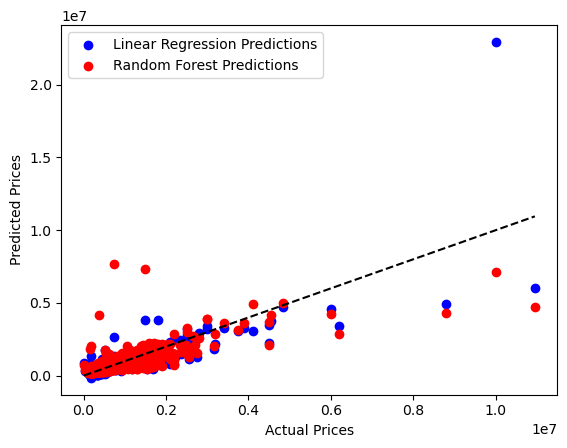

In [20]:
# Visual Comparison
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression Predictions')
plt.scatter(y_test, y_pred_rf, color='red', label='Random Forest Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

## 5. Model Selection

## final_model = model_rf because rmse_rf < rmse_lr

##  Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_